In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Dec 14 23:13:29 2019

@author: Amin-CSL
"""
import numpy as np
def BATADAL_getdata():
    filename='Physical_BATADAL.npy'
    data=np.load(filename)
    print('Dataset BATADAL Loaded')
    datalen=len(data[0])
    X=data[:,0:datalen-2]
    y=data[:,datalen-1]
    return X,y

In [3]:
import numpy as np
from numpy import savetxt
filename='Physical_BATADAL.npy'
data=np.load(filename,allow_pickle=True)
print('Dataset BATADAL Loaded')
datalen=len(data[0])
X=data[:,0:datalen-2]
y=data[:,datalen-1]
print(data.shape)

Dataset BATADAL Loaded
(12938, 46)


In [4]:
savetxt('Physical_BATADAL.csv', data,fmt='%s', delimiter=',')

In [5]:
import pandas as pd
data=pd.read_csv("Physical_BATADAL.csv", names=['DATETIME','L_T1','L_T2','L_T3','L_T4','L_T5','L_T6','L_T7','F_PU1','S_PU1','F_PU2','S_PU2','F_PU3','S_PU3','F_PU4','S_PU4','F_PU5','S_PU5','F_PU6','S_PU6','F_PU7','S_PU7','F_PU8','S_PU8','F_PU9','S_PU9','F_PU10','S_PU10','F_PU11','S_PU11','F_V2','S_V2','P_J280','P_J269','P_J300','P_J256','P_J289','P_J415','P_J302','P_J306','P_J307','P_J317','P_J14','extra','P_J422','ATT_FLAG'])
print(data.head(5))

      DATETIME  L_T1  L_T2  L_T3  L_T4  L_T5  L_T6  L_T7  F_PU1  S_PU1  ...  \
0  04/07/16 00  2.44  5.24  3.19  4.10  2.86  5.50  4.39  93.63    1.0  ...   
1  04/07/16 01  2.66  4.53  3.20  4.18  3.29  5.44  4.53  89.41    1.0  ...   
2  04/07/16 02  3.11  3.66  3.66  4.21  3.87  5.15  3.22  89.88    1.0  ...   
3  04/07/16 03  3.62  3.04  4.17  4.04  3.56  4.98  2.40  88.10    1.0  ...   
4  04/07/16 04  4.08  2.68  4.73  3.20  3.11  5.39  3.46  87.01    1.0  ...   

   P_J289  P_J415  P_J302  P_J306  P_J307  P_J317  P_J14  extra  P_J422  \
0   28.22   85.87   21.69   82.72   21.58   71.99  39.33  29.64  -999.0   
1   24.45   84.87   29.81   86.62   29.81   59.76  42.17  26.15  -999.0   
2   23.90   87.11   29.85   87.64   29.85   58.50  42.00  25.56  -999.0   
3   27.10   68.75   31.60   64.25   31.47   72.30  43.24  28.38  -999.0   
4   26.76   68.74   32.30   64.23   32.17   72.53  44.00  28.04  -999.0   

   ATT_FLAG  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4   

In [6]:
data.ATT_FLAG[data.ATT_FLAG == 'Normal'] = 0
data.ATT_FLAG[data.ATT_FLAG == 'Attack'] = 1
data["P_J422"] = data["P_J422"].astype('category')
data["P_J422_code"] = data["P_J422"].cat.codes
data.P_J422_code[data.P_J422_code == '2'] = 0
data['ATT_FLAG'] = data['ATT_FLAG'].astype('int')

c:\users\ieuser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ieuser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ieuser\appdata\local\programs\python\python36\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
c:\users\ieuser\appdata\l

In [7]:
print(data.head(5))
Normaldf=data.loc[data['ATT_FLAG'] == 0]
print("Normalshape",Normaldf.shape)
malwaredf=data.loc[data['ATT_FLAG'] == 1]
print("Malwareshape",malwaredf.shape)



      DATETIME  L_T1  L_T2  L_T3  L_T4  L_T5  L_T6  L_T7  F_PU1  S_PU1  ...  \
0  04/07/16 00  2.44  5.24  3.19  4.10  2.86  5.50  4.39  93.63    1.0  ...   
1  04/07/16 01  2.66  4.53  3.20  4.18  3.29  5.44  4.53  89.41    1.0  ...   
2  04/07/16 02  3.11  3.66  3.66  4.21  3.87  5.15  3.22  89.88    1.0  ...   
3  04/07/16 03  3.62  3.04  4.17  4.04  3.56  4.98  2.40  88.10    1.0  ...   
4  04/07/16 04  4.08  2.68  4.73  3.20  3.11  5.39  3.46  87.01    1.0  ...   

   P_J415  P_J302  P_J306  P_J307  P_J317  P_J14  extra  P_J422  ATT_FLAG  \
0   85.87   21.69   82.72   21.58   71.99  39.33  29.64  -999.0         0   
1   84.87   29.81   86.62   29.81   59.76  42.17  26.15  -999.0         0   
2   87.11   29.85   87.64   29.85   58.50  42.00  25.56  -999.0         0   
3   68.75   31.60   64.25   31.47   72.30  43.24  28.38  -999.0         0   
4   68.74   32.30   64.23   32.17   72.53  44.00  28.04  -999.0         0   

   P_J422_code  
0            0  
1            0  
2          

In [8]:
feature_cols= ['P_J422_code','L_T1','L_T2','L_T3','L_T4','L_T5','L_T6','L_T7','F_PU1','S_PU1','F_PU2','S_PU2','F_PU3','S_PU3','F_PU4','S_PU4','F_PU5','S_PU5','F_PU6','S_PU6','F_PU7','S_PU7','F_PU8','S_PU8','F_PU9','S_PU9','F_PU10','S_PU10','F_PU11','S_PU11','F_V2','S_V2','P_J280','P_J269','P_J300','P_J256','P_J289','P_J415','P_J302','P_J306','P_J307','P_J317','P_J14','extra','ATT_FLAG']
mod_dataset = data[feature_cols]
print(mod_dataset.head(5))

   P_J422_code  L_T1  L_T2  L_T3  L_T4  L_T5  L_T6  L_T7  F_PU1  S_PU1  ...  \
0            0  2.44  5.24  3.19  4.10  2.86  5.50  4.39  93.63    1.0  ...   
1            0  2.66  4.53  3.20  4.18  3.29  5.44  4.53  89.41    1.0  ...   
2            0  3.11  3.66  3.66  4.21  3.87  5.15  3.22  89.88    1.0  ...   
3            0  3.62  3.04  4.17  4.04  3.56  4.98  2.40  88.10    1.0  ...   
4            0  4.08  2.68  4.73  3.20  3.11  5.39  3.46  87.01    1.0  ...   

   P_J256  P_J289  P_J415  P_J302  P_J306  P_J307  P_J317  P_J14  extra  \
0   70.00   28.22   85.87   21.69   82.72   21.58   71.99  39.33  29.64   
1   87.73   24.45   84.87   29.81   86.62   29.81   59.76  42.17  26.15   
2   89.29   23.90   87.11   29.85   87.64   29.85   58.50  42.00  25.56   
3   91.98   27.10   68.75   31.60   64.25   31.47   72.30  43.24  28.38   
4   92.11   26.76   68.74   32.30   64.23   32.17   72.53  44.00  28.04   

   ATT_FLAG  
0         0  
1         0  
2         0  
3         0  
4   

In [9]:
mod_dataset.to_csv (r'Physical_BATADAL_final.csv', index = False, header=True)

In [36]:

from sklearn.feature_selection import SelectKBest, chi2
pima = pd.read_csv("Physical_BATADAL_final.csv")
print (pima.head())
X = pima.iloc[:,0:44]  #independent columns
y = pima.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

   P_J422_code  L_T1  L_T2  L_T3  L_T4  L_T5  L_T6  L_T7  F_PU1  S_PU1  ...  \
0            0  2.44  5.24  3.19  4.10  2.86  5.50  4.39  93.63    1.0  ...   
1            0  2.66  4.53  3.20  4.18  3.29  5.44  4.53  89.41    1.0  ...   
2            0  3.11  3.66  3.66  4.21  3.87  5.15  3.22  89.88    1.0  ...   
3            0  3.62  3.04  4.17  4.04  3.56  4.98  2.40  88.10    1.0  ...   
4            0  4.08  2.68  4.73  3.20  3.11  5.39  3.46  87.01    1.0  ...   

   P_J256  P_J289  P_J415  P_J302  P_J306  P_J307  P_J317  P_J14  extra  \
0   70.00   28.22   85.87   21.69   82.72   21.58   71.99  39.33  29.64   
1   87.73   24.45   84.87   29.81   86.62   29.81   59.76  42.17  26.15   
2   89.29   23.90   87.11   29.85   87.64   29.85   58.50  42.00  25.56   
3   91.98   27.10   68.75   31.60   64.25   31.47   72.30  43.24  28.38   
4   92.11   26.76   68.74   32.30   64.23   32.17   72.53  44.00  28.04   

   ATT_FLAG  
0         0  
1         0  
2         0  
3         0  
4   

In [37]:
from sklearn.decomposition import PCA
import pandas as pd
pima = pd.read_csv("Physical_BATADAL_final.csv")
print (pima.head())
array = pima.values
X = array[:,0:44]  #independent columns
Y = array[:,44]
pca = PCA(n_components=10)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
#print(fit.components_)
#feat_importances = pd.Series(fit.components_, index=X.columns)
#feat_importances.nlargest(15).plot(kind='barh')

   P_J422_code  L_T1  L_T2  L_T3  L_T4  L_T5  L_T6  L_T7  F_PU1  S_PU1  ...  \
0            0  2.44  5.24  3.19  4.10  2.86  5.50  4.39  93.63    1.0  ...   
1            0  2.66  4.53  3.20  4.18  3.29  5.44  4.53  89.41    1.0  ...   
2            0  3.11  3.66  3.66  4.21  3.87  5.15  3.22  89.88    1.0  ...   
3            0  3.62  3.04  4.17  4.04  3.56  4.98  2.40  88.10    1.0  ...   
4            0  4.08  2.68  4.73  3.20  3.11  5.39  3.46  87.01    1.0  ...   

   P_J256  P_J289  P_J415  P_J302  P_J306  P_J307  P_J317  P_J14  extra  \
0   70.00   28.22   85.87   21.69   82.72   21.58   71.99  39.33  29.64   
1   87.73   24.45   84.87   29.81   86.62   29.81   59.76  42.17  26.15   
2   89.29   23.90   87.11   29.85   87.64   29.85   58.50  42.00  25.56   
3   91.98   27.10   68.75   31.60   64.25   31.47   72.30  43.24  28.38   
4   92.11   26.76   68.74   32.30   64.23   32.17   72.53  44.00  28.04   

   ATT_FLAG  
0         0  
1         0  
2         0  
3         0  
4   

In [10]:
feature_cols= ['P_J422_code','F_PU6','F_PU11','S_PU6','S_PU11','F_PU7','ATT_FLAG']
mod_dataset = data[feature_cols]
print(mod_dataset.head(5))
mod_dataset.to_csv (r'Physical_BATADAL_final.csv', index = False, header=True)

   P_J422_code  F_PU6  F_PU11  S_PU6  S_PU11  F_PU7  ATT_FLAG
0            0    0.0     0.0    0.0     0.0  49.84         0
1            0    0.0     0.0    0.0     0.0  48.38         0
2            0    0.0     0.0    0.0     0.0  46.84         0
3            0    0.0     0.0    0.0     0.0   0.00         0
4            0    0.0     0.0    0.0     0.0   0.00         0


   P_J422_code  F_PU6  F_PU11  S_PU6  S_PU11  F_PU7  ATT_FLAG
0            0    0.0     0.0      0     0.0  49.84         0
1            0    0.0     0.0      0     0.0  48.38         0
2            0    0.0     0.0      0     0.0  46.84         0
3            0    0.0     0.0      0     0.0   0.00         0
4            0    0.0     0.0      0     0.0   0.00         0
   P_J422_code  F_PU6  F_PU11  S_PU6  S_PU11  F_PU7
0            0    0.0     0.0      0     0.0  49.84
1            0    0.0     0.0      0     0.0  48.38
2            0    0.0     0.0      0     0.0  46.84
3            0    0.0     0.0      0     0.0   0.00
4            0    0.0     0.0      0     0.0   0.00


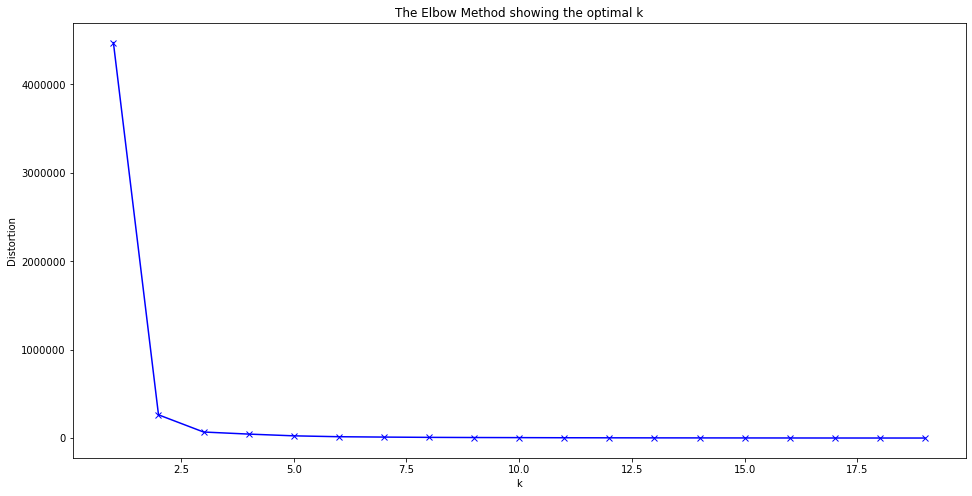

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
df=pd.read_csv("Physical_BATADAL_final.csv")
print(df.head(5))
feature_cols= ['P_J422_code','F_PU6','F_PU11','S_PU6','S_PU11','F_PU7']
#we are usingh
df=df[feature_cols]
print(df.head(5))
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [33]:
############
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
mod_dataset=pd.read_csv("Physical_BATADAL_final.csv")
#print(df.head(5))
feature_cols= ['P_J422_code','F_PU6','F_PU11','S_PU6','S_PU11','F_PU7']
#we are usingh
#df=df[feature_cols]
features= ['P_J422_code','F_PU6','F_PU11','S_PU6','S_PU11','F_PU7','ATT_FLAG']
X= mod_dataset[features]
Y= mod_dataset['ATT_FLAG']

sm=SMOTE(random_state=32)
x_res,y_res =sm.fit_resample(X,Y)
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=0) # 70% training and 30% test
print('smode date {}'.format(Counter(y_res)))
print(x_res)
x_res.to_csv (r'Physical_BATADAL_final_SMOTE.csv', index = False, header=True)

smode date Counter({0: 12446, 1: 12446})
       P_J422_code      F_PU6  F_PU11  S_PU6  S_PU11      F_PU7  ATT_FLAG
0                0   0.000000     0.0    0.0     0.0  49.840000         0
1                0   0.000000     0.0    0.0     0.0  48.380000         0
2                0   0.000000     0.0    0.0     0.0  46.840000         0
3                0   0.000000     0.0    0.0     0.0   0.000000         0
4                0   0.000000     0.0    0.0     0.0   0.000000         0
...            ...        ...     ...    ...     ...        ...       ...
24887            0   0.000000     0.0    0.0     0.0   0.000000         1
24888            0   0.000000     0.0    0.0     0.0  49.472812         1
24889            0   0.000000     0.0    0.0     0.0  50.714522         1
24890            2   0.000000     0.0    0.0     0.0  48.554107         1
24891            0  50.557737     0.0    1.0     0.0   0.000000         1

[24892 rows x 7 columns]


[0.02533848 0.0174098  0.01675857 0.01739074 0.01329511 0.01375555
 0.01771857 0.02299299 0.         0.01838573 0.00468099 0.
 0.         0.00742596 0.00405947 0.         0.         0.05344715
 0.04874375 0.05834426 0.01206107 0.01340671 0.00413457 0.
 0.         0.01457322 0.00518207 0.01763595 0.01817146 0.01968714
 0.00228714 0.03609259 0.02586505 0.01859131 0.01668645 0.01824975
 0.04541364 0.02571009 0.01493388 0.02840176 0.02923504 0.02582208
 0.01793593 0.25017599]


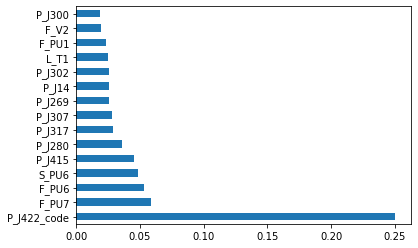

In [53]:

features=['L_T1','L_T2','L_T3','L_T4','L_T5','L_T6','L_T7','F_PU1','S_PU1','F_PU2','S_PU2','F_PU3','S_PU3','F_PU4','S_PU4','F_PU5','S_PU5','F_PU6','S_PU6','F_PU7','S_PU7','F_PU8','S_PU8','F_PU9','S_PU9','F_PU10','S_PU10','F_PU11','S_PU11','F_V2','S_V2','P_J280','P_J269','P_J300','P_J256','P_J289','P_J415','P_J302','P_J306','P_J307','P_J317','P_J14','extra','P_J422_code']
X= mod_dataset[features]
Y= mod_dataset['ATT_FLAG']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [34]:
from time import time
start = time()
%run fairtree.py 1 3 20 Physical_BATADAL_final.csv 1000
from time import time
end = time()
duration = end- start
print(duration)

Loading data from input CSV file
Invalid color label in line 0 , skipping
Number of data points: 1000
Dimension: 6
Balance: 1 3
Constructing tree...
Doing fair clustering...
Fairlet decomposition time: 0.7404265403747559
Fairlet decomposition cost: 142.595554297093
Doing k-median clustering on fairlet centers...
Computing fair k-median cost...
Fairlet decomposition cost: 142.595554297093
k-Median cost: 205.23403704132983
26.27820110321045


In [18]:
%run accuracy_fairtree.py 1 3 2 Physical_BATADAL_final.csv

Loading data from input CSV file
Invalid color label in line 0 , skipping
Number of data points: 12938
Dimension: 6
Balance: 1 3
Constructing tree...
Doing fair clustering...
Fairlet decomposition cost: 675.1543516856676
Doing k-median clustering on fairlet centers...
3555
Label [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

idx is:  [[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],

              precision    recall  f1-score   support

           1       0.08      0.35      0.13       150
           0       0.97      0.83      0.89      3405

    accuracy                           0.81      3555
   macro avg       0.52      0.59      0.51      3555
weighted avg       0.93      0.81      0.86      3555

Computing fair k-median cost...
Fairlet decomposition cost: 675.1543516856676
k-Median cost: 15931.753212255713


In [19]:
%run multi_cluster_accuracy_fairtree.py 1 3 5 Physical_BATADAL_final.csv

Loading data from input CSV file
Invalid color label in line 0 , skipping
Number of data points: 12938
Dimension: 6
Balance: 1 3
Constructing tree...
Doing fair clustering...
Fairlet decomposition cost: 729.0987268542737
Doing k-median clustering on fairlet centers...
3577
Label [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

res_idx [1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2

Fairlet decomposition cost: 729.0987268542737
k-Median cost: 6612.994744669691


In [15]:
import matlab.engine
import pandas as pd
import numpy as np
df=pd.read_csv("Physical_BATADAL_final.csv")
print(df.shape)
X = df.iloc[:,0:6] 
Y= df.iloc[:,-1] 
res1=np.asarray(Y)
df1=np.asarray(X)
data=matlab.double(df1.tolist())
#print("data is", data)
eng = matlab.engine.start_matlab()
idx,C,sumd,D,midx,info = eng.kmedoids(data, 2,'Distance','euclidean', nargout=6)
print("idx is: ", idx)

(12938, 7)
idx is:  [[1.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[1.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[2.0],[1.0],[2.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[1.0],[

In [16]:
from sklearn import metrics
res_idx = [sub[0] for sub in idx]
print("res_idx",res_idx)
print(len(res_idx))


res_idx1=np.asarray(res_idx)
res_idx1=res_idx1.astype('int32') 
res_idx1=np.where(res_idx1==1, 0, res_idx1)
res_idx1=np.where(res_idx1==2, 1, res_idx1)
print("res_idx1",res_idx1)
print("label is: ",res1)
#accuracy
actual=res1.tolist()
pred=res_idx1.tolist()
print("accuracy-1")
print(metrics.confusion_matrix(actual, pred, labels=[1, 0]))
print(metrics.classification_report(actual, pred, labels=[1, 0]))

#accuracy2
res_idx1=np.asarray(res_idx)
res_idx1=res_idx1.astype('int32') 
res_idx1=np.where(res_idx1==2, 0, res_idx1)
res_idx1=np.where(res_idx1==1, 1, res_idx1)
print("res_idx1",res_idx1)


actual=res1.tolist()
pred=res_idx1.tolist()
print("accuracy-2")
print(metrics.confusion_matrix(actual, pred, labels=[1, 0]))
print(metrics.classification_report(actual, pred, labels=[1, 0]))

res_idx [1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1

              precision    recall  f1-score   support

           1       0.07      0.30      0.11       492
           0       0.97      0.85      0.90     12446

    accuracy                           0.82     12938
   macro avg       0.52      0.57      0.51     12938
weighted avg       0.93      0.82      0.87     12938

res_idx1 [1 1 1 ... 1 1 1]
accuracy-2
[[  345   147]
 [10518  1928]]
              precision    recall  f1-score   support

           1       0.03      0.70      0.06       492
           0       0.93      0.15      0.27     12446

    accuracy                           0.18     12938
   macro avg       0.48      0.43      0.16     12938
weighted avg       0.90      0.18      0.26     12938

